# In this assignment we will use the same data used in the previous assignment.

## - Create a Categorical variable based on Team column and show how many values per each Team exists.

## - Create a new variable called teams_salaries and group only the two columns of Salary and Team of the csv_df based on the Team values. Then using the new teams_salaries values, replace each row's salary by its Team average salary. 

In [1]:
import pandas as pd

df = pd.read_csv('employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
#Replacing the Nan values with string 'NaN'
df.Team.fillna(value = 'NaN', inplace = True)

In [3]:
Team_type = df['Team'].astype('category')
print("Values per each team")
Team_type.value_counts()

Values per each team


Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
NaN                      43
Name: Team, dtype: int64

In [4]:
teams_salaries = df.groupby('Team')['Salary']

In [5]:
df['Salary'] = teams_salaries.transform('mean')
print("After replacing salary with average team salary")
print("----------------------------------------------------------------------")
print(df)

After replacing salary with average team salary
----------------------------------------------------------------------
    First Name  Gender  Start Date Last Login Time        Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM  90435.591837    6.945   
1       Thomas    Male   3/31/1996         6:53 AM  90763.139535    4.170   
2        Maria  Female   4/23/1993        11:17 AM  92219.480392   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  92219.480392    9.340   
4        Larry    Male   1/24/1998         4:47 PM  88224.424528    1.389   
..         ...     ...         ...             ...           ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  88500.466667   16.655   
996    Phillip    Male   1/31/1984         6:30 AM  92219.480392   19.675   
997    Russell    Male   5/20/2013        12:39 PM  88665.505263    1.421   
998      Larry    Male   4/20/2013         4:45 PM  91866.316832   11.985   
999     Albert    Male   5/15/2012

## - Plot the team salaries in a single plot and using the bar plot type where X-Axis is the Team and Y-Axis is the average salary. Change the X-labels to match the team name.   

<AxesSubplot:xlabel='Team'>

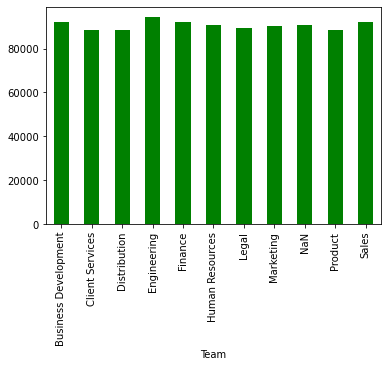

In [6]:
teams_salaries.mean().plot.bar(color = 'g')
#If doesnt show at first, run this cell again!

## - Use to_datetime() function of pandas to convert the Start Date column to a Series of datetime objects. 

## - Use the result of previous task to create a Time Series of Bonuses (Let's assume the whole bonus column belongs to a single person and is changing through time). 

## - Plot the time series where X-Axis is the time and Y-Axis is the bonus value and use Scatter plot for better presentation. Change the color and marker from default to your desired values. 

## - After creating the new Time Series object, print the bonus values before January 1st of 2008.  

## - Downsample the Time Series by intervals of 3 months and based on averaging the bonuses. 

In [7]:
#Convert start data column to series of datetime object
df['Start Date'] = pd.to_datetime(df["Start Date"])
#Sorting series by date
s = df.sort_values(by = 'Start Date')["Start Date"]
print(s)

954   1980-01-19
49    1980-01-24
881   1980-01-28
272   1980-02-20
549   1980-02-25
         ...    
239   2016-05-12
444   2016-05-24
15    2016-06-05
98    2016-06-16
451   2016-07-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]


In [8]:
#sorting bonuses by date
b = df.sort_values(by = 'Start Date')['Bonus %']
print(b)

954     1.148
49      3.055
881     6.318
272    18.225
549     3.186
        ...  
239    17.612
444     7.008
15      1.256
98     16.961
451    19.490
Name: Bonus %, Length: 1000, dtype: float64


In [9]:
#Creating sorted time series for bonus
time_series = pd.Series(list(b), index = s)
print(time_series)

Start Date
1980-01-19     1.148
1980-01-24     3.055
1980-01-28     6.318
1980-02-20    18.225
1980-02-25     3.186
               ...  
2016-05-12    17.612
2016-05-24     7.008
2016-06-05     1.256
2016-06-16    16.961
2016-07-15    19.490
Length: 1000, dtype: float64


<AxesSubplot:title={'center':'Bonus % over time'}, xlabel='Start Date'>

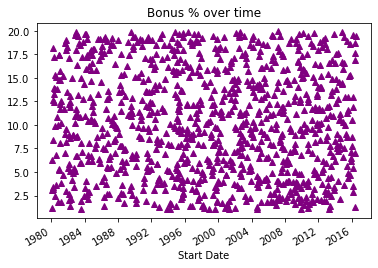

In [10]:
#Setting marker as upward triangle and color as purple. 
time_series.plot(style='^', color = 'purple', title = 'Bonus % over time')

In [11]:
print("Bonus values before January 1st 2008")
time_series.truncate(after='2008-01-01')

Bonus values before January 1st 2008


Start Date
1980-01-19     1.148
1980-01-24     3.055
1980-01-28     6.318
1980-02-20    18.225
1980-02-25     3.186
               ...  
2007-09-29    17.290
2007-09-30    15.843
2007-10-02     3.694
2007-10-08    11.934
2007-11-23     7.461
Length: 753, dtype: float64

In [12]:
print("Downsampling the Time Series by intervals of 3 months and based on averaging the bonuses.")
time_series.resample('3M').mean()

Downsampling the Time Series by intervals of 3 months and based on averaging the bonuses.


Start Date
1980-01-31     3.507000
1980-04-30    10.426857
1980-07-31    10.192750
1980-10-31    12.474500
1981-01-31    11.314000
                ...    
2015-07-31    10.327500
2015-10-31    10.002500
2016-01-31     9.347143
2016-04-30     9.394667
2016-07-31    13.511167
Freq: 3M, Length: 147, dtype: float64